In [1]:
from lj import LJ
import h5py
import torch
import matplotlib.pyplot as plt

In [2]:
nbparticles = 13
dim = 3
boxlength = (nbparticles) ** (1/dim)
temp = 0.5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



# center them
# lj-= lj.mean(dim=1, keepdim=True)
ljsystem = LJ(  
  nparticles=nbparticles,
  dim=dim,
  device=device,
  boxlength= boxlength,
  kT=0.5,
  sigma = 1/(2**(1/6)),
  shift=False,
  spring_constant = 0.5,
  periodic=False)



In [ ]:
import numpy as np
data = torch.tensor(np.load("lj_0.5.npy")).reshape(-1, nbparticles, dim).to(device)

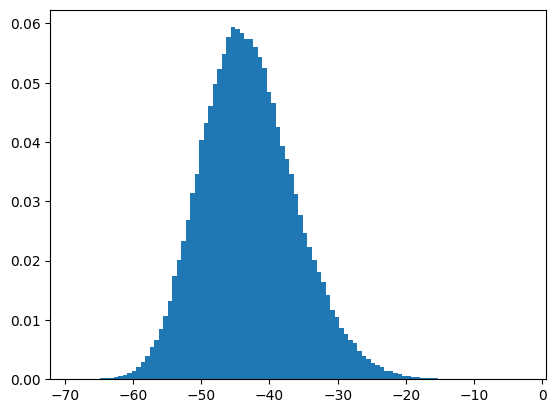

In [8]:

ref_potential = ljsystem.potential(data, turn_off_harmonic=False).flatten()/temp
plt.hist(ref_potential.cpu().numpy(), bins=100, density=True)
plt.show()
#ref_bin, ref_g_r = ljsystem.g_r(data, bins=200)
# pairwise distances
dists = torch.norm(data.unsqueeze(2) - data.unsqueeze(1), dim=-1)  # shape (batch, N, N)
mask = ~torch.eye(data.shape[1], device=data.device).bool()
dists = dists[:, mask].reshape(-1)
plt.show()
